In [3]:
#by Willkie
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
#https://discord.com/channels/1134059900666916935/1283610000484208670

In [4]:
%run _01_data_loading.ipynb

Data saved as data/output/1227.csv
Processed valid data saved as data/output/1227_processed.csv
Data saved as data/output/1219.csv
Processed valid data saved as data/output/1219_processed.csv
Data saved as data/output/1218.csv
Processed valid data saved as data/output/1218_processed.csv
Data saved as data/output/1224.csv
Processed valid data saved as data/output/1224_processed.csv
Data saved as data/output/1220.csv
Processed valid data saved as data/output/1220_processed.csv
Data saved as data/output/1221.csv
Processed valid data saved as data/output/1221_processed.csv
Data saved as data/output/1223.csv
Processed valid data saved as data/output/1223_processed.csv
Data saved as data/output/1222.csv
Processed valid data saved as data/output/1222_processed.csv
Data saved as data/output/1213.csv
Processed valid data saved as data/output/1213_processed.csv
Data saved as data/output/1212.csv
Processed valid data saved as data/output/1212_processed.csv
Data saved as data/output/1211.csv
Proce

In [5]:
df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,1,오후 8:51,109,용기사,None,협동,2025-da-ta/txt/1227.txt-12-27,True,False,36.538611,36.538611,3865.452629
1,2,오후 8:51,109,크루세이더,None,듀파,2025-da-ta/txt/1227.txt-12-27,True,False,33.273266,33.273266,3563.953752
2,2,오후 8:51,89,허밋,None,듀파,2025-da-ta/txt/1227.txt-12-27,True,False,19.182637,19.182637,1717.938937
3,2,오후 8:51,97,프리스트,None,듀파,2025-da-ta/txt/1227.txt-12-27,True,False,6.330342,6.330342,616.474221
4,3,오후 8:51,135,프리스트,None,불어전,2025-da-ta/txt/1227.txt-12-27,True,False,6.330342,6.330342,879.770354
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,292,오후 1:59,143,용기사,5000,블와둥,2025-da-ta/txt/1217.txt-12-17,True,True,34.965035,35.282984,5000.000000
5337,297,오후 1:59,119,프리스트,None,검켄,2025-da-ta/txt/1217.txt-12-17,True,False,6.320755,6.320755,735.595888
5338,297,오후 1:59,134,프리스트,None,검켄,2025-da-ta/txt/1217.txt-12-17,True,False,6.320755,6.320755,830.443198
5339,300,오후 1:59,123,프리스트,None,None,2025-da-ta/txt/1217.txt-12-17,False,False,6.320755,6.320755,782.686455


In [6]:
processed_df

,party_id,time,level,job,spec,map,date,valid,valid_spec,spec_by_level,avg_spec_by_level,spec_filled
0,9,오후 8:52,124,허밋,2350,불어전,2025-da-ta/txt/1227.txt-12-27,True,True,18.951613,19.182637,2350.0
1,19,오후 8:52,128,크루세이더,4200,깊바협,2025-da-ta/txt/1227.txt-12-27,True,True,32.812500,33.273266,4200.0
2,27,오후 8:53,102,프리스트,660,검켄,2025-da-ta/txt/1227.txt-12-27,True,True,6.470588,6.330342,660.0
3,37,오후 8:53,137,저격수,3550,망용둥,2025-da-ta/txt/1227.txt-12-27,True,True,25.912409,24.820226,3550.0
4,41,오후 8:53,126,레인저,2800,듀파,2025-da-ta/txt/1227.txt-12-27,True,True,22.222222,23.111803,2800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
638,260,오후 1:57,106,나이트,3143,듀파,2025-da-ta/txt/1217.txt-12-17,True,True,29.650943,30.555809,3143.0
639,260,오후 1:57,89,나이트,2800,듀파,2025-da-ta/txt/1217.txt-12-17,True,True,31.460674,30.555809,2800.0
640,263,오후 1:57,106,프리스트,670,불어전,2025-da-ta/txt/1217.txt-12-17,True,True,6.320755,6.320755,670.0
641,263,오후 1:57,107,용기사,3400,불어전,2025-da-ta/txt/1217.txt-12-17,True,True,31.775701,35.282984,3400.0


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341 entries, 0 to 5340
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   party_id           5341 non-null   int64  
 1   time               5341 non-null   object 
 2   level              5341 non-null   int64  
 3   job                5341 non-null   object 
 4   spec               758 non-null    float64
 5   map                4784 non-null   object 
 6   date               5341 non-null   object 
 7   valid              5341 non-null   bool   
 8   valid_spec         5341 non-null   bool   
 9   spec_by_level      4967 non-null   float64
 10  avg_spec_by_level  4967 non-null   float64
 11  spec_filled        4967 non-null   float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 427.8+ KB
None

Data Overview:
   party_id     time  level    job  spec  map                           date  \
0         1  오후 8:51    109    용기사 

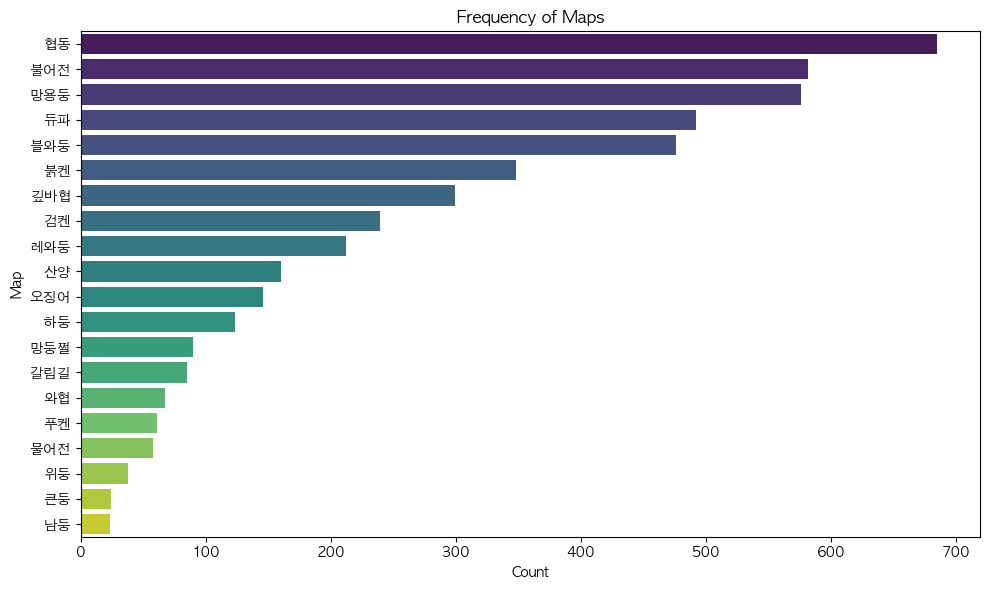

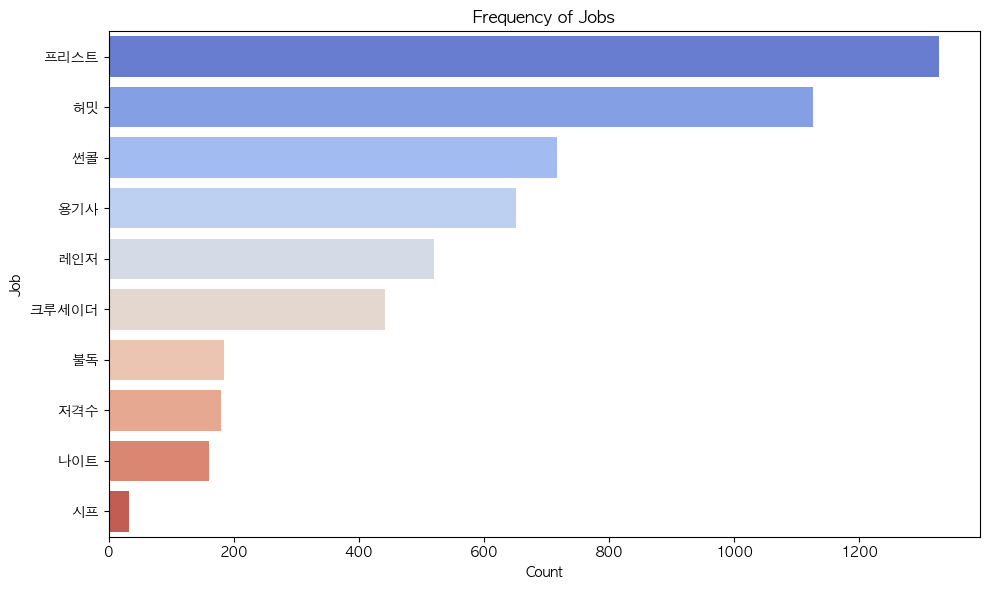

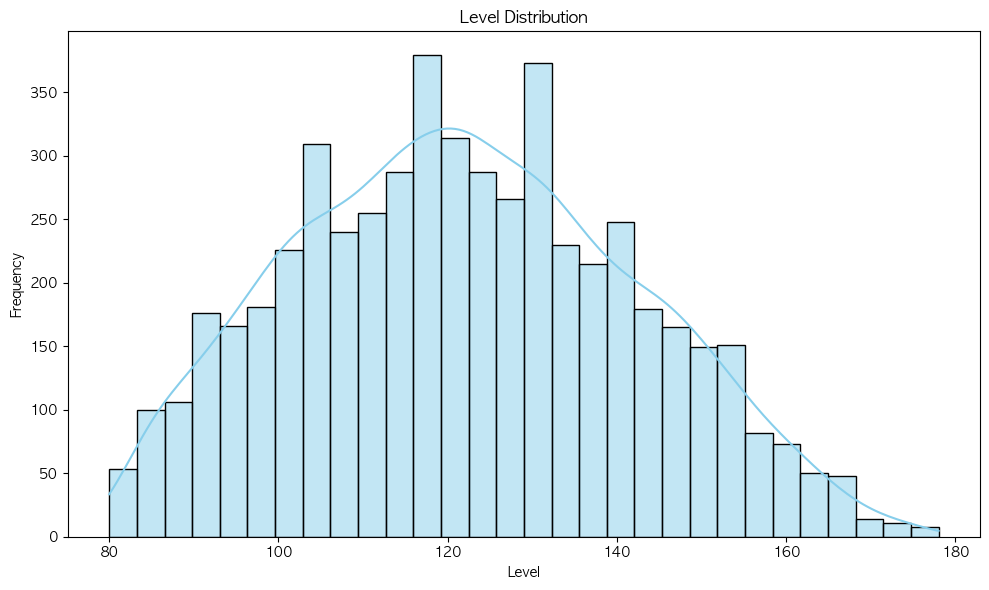

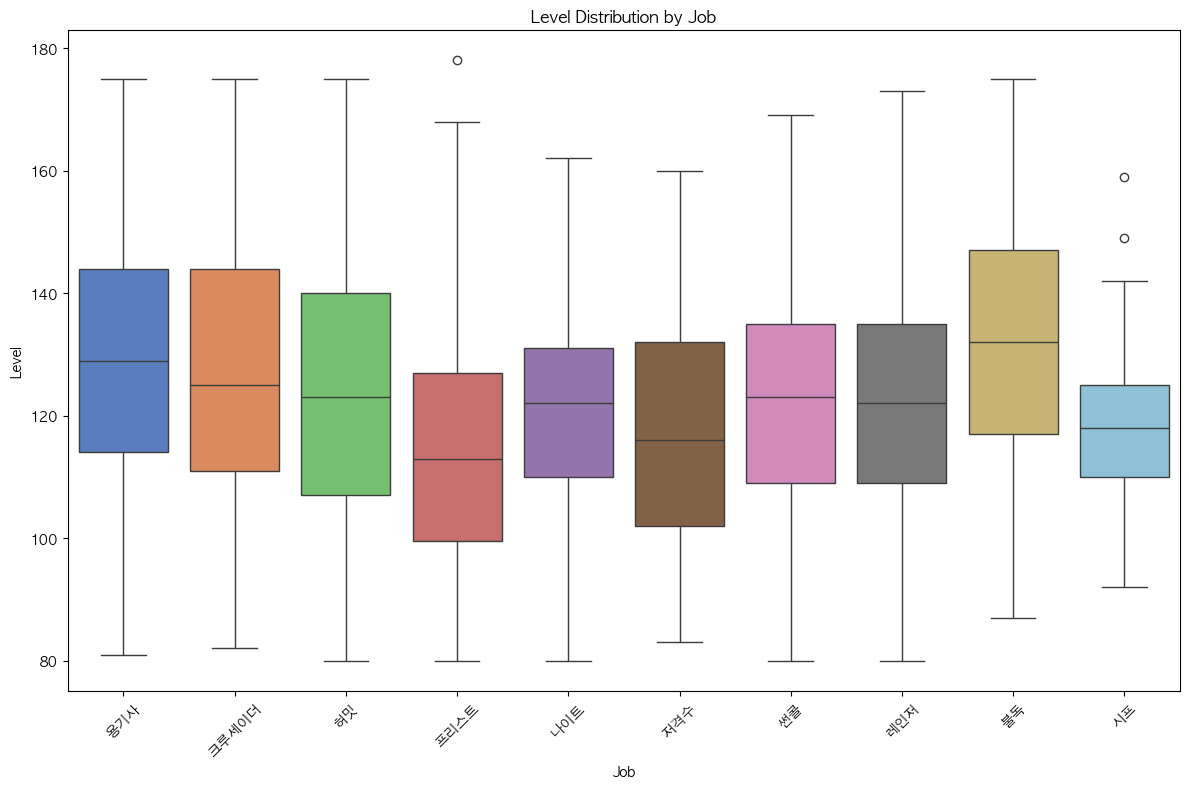

In [7]:
%run _02_eda.ipynb

map_dist(df)
job_dist(df)
level_dist(df)
level_dist_by_job(df)

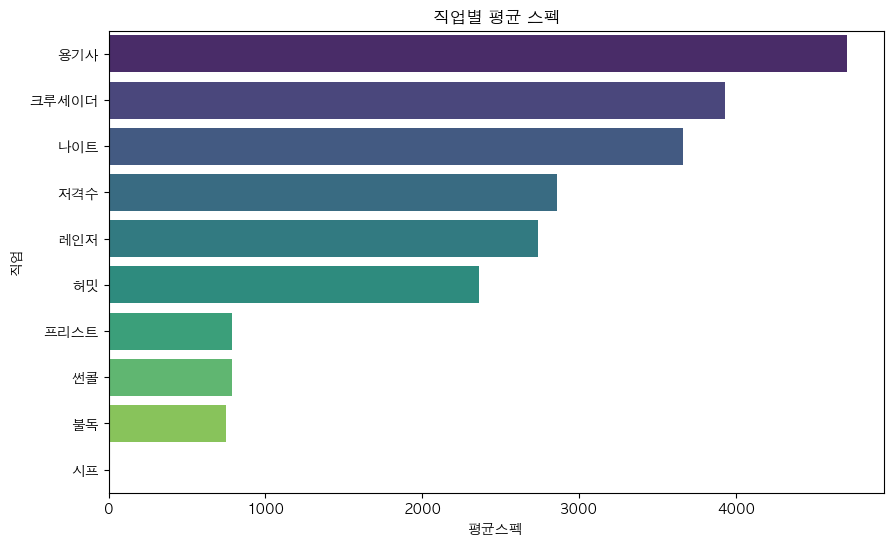

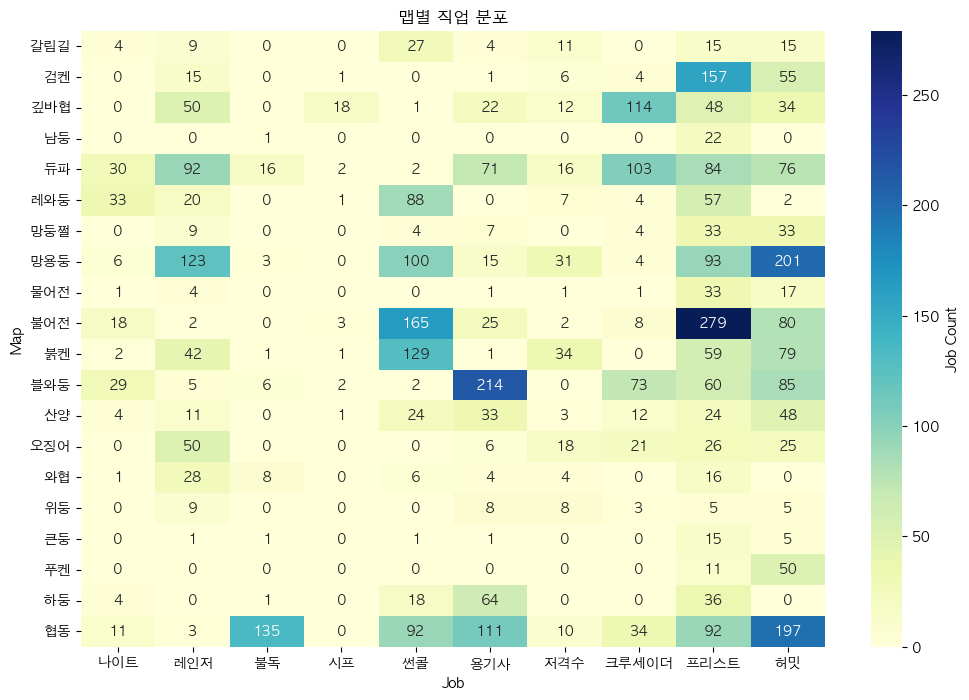

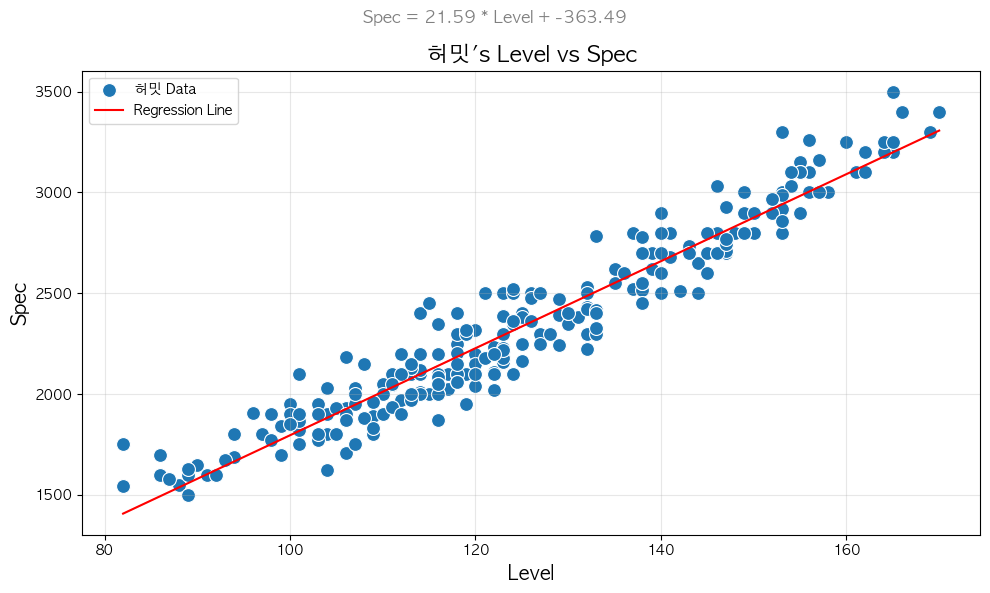

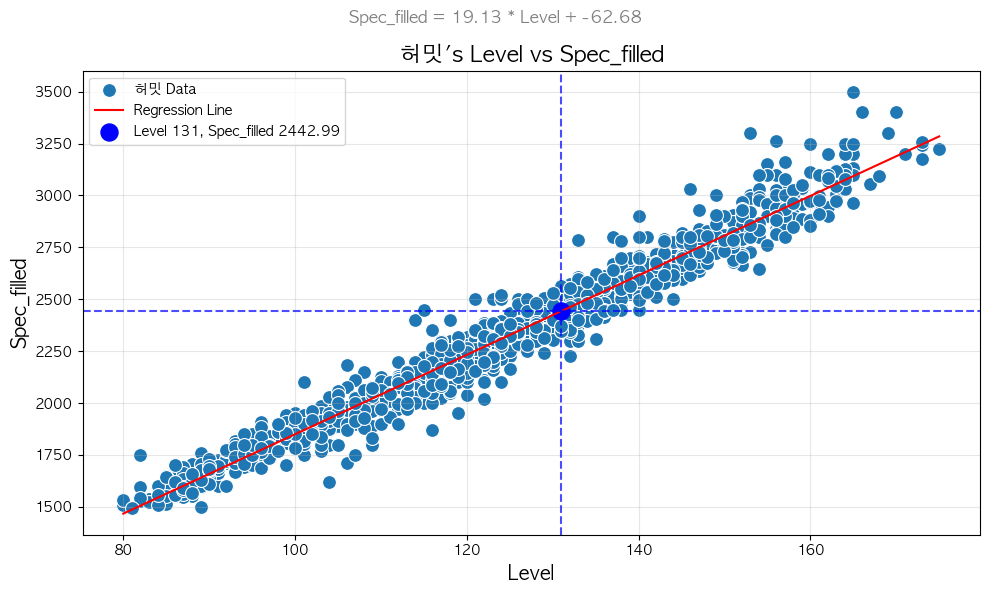

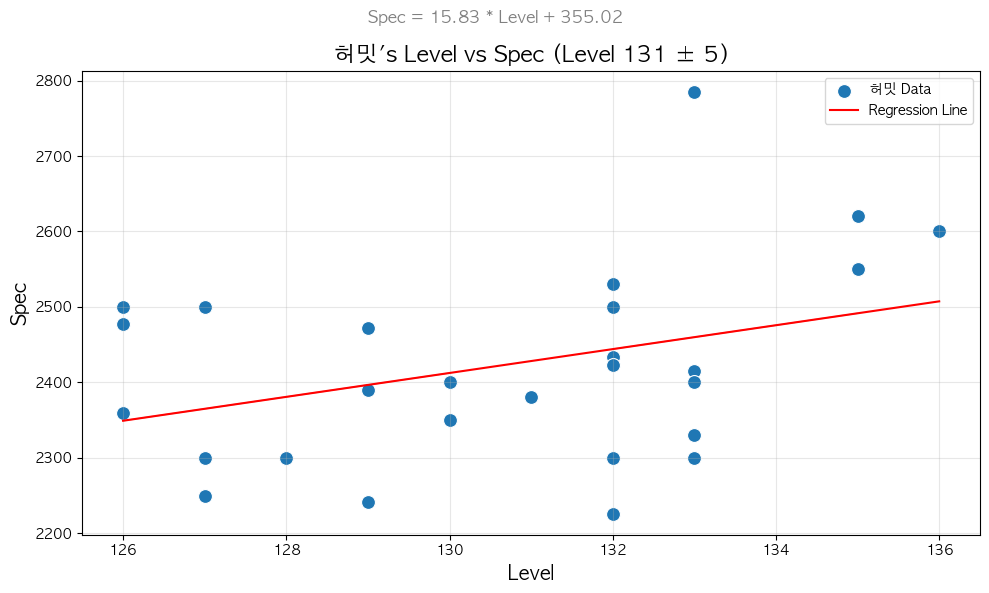

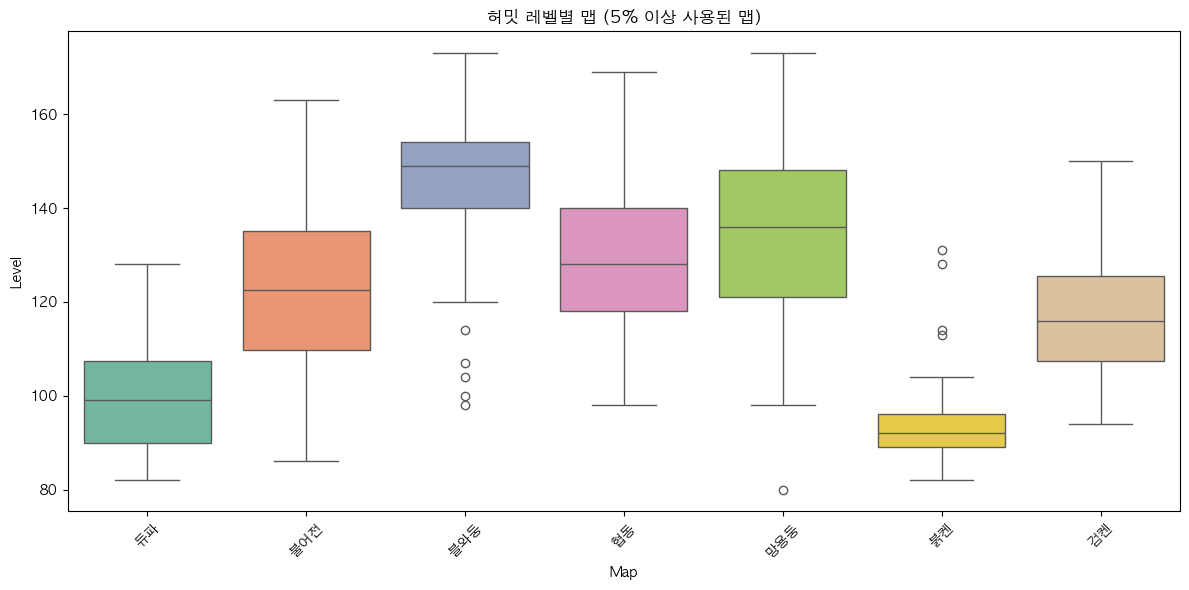

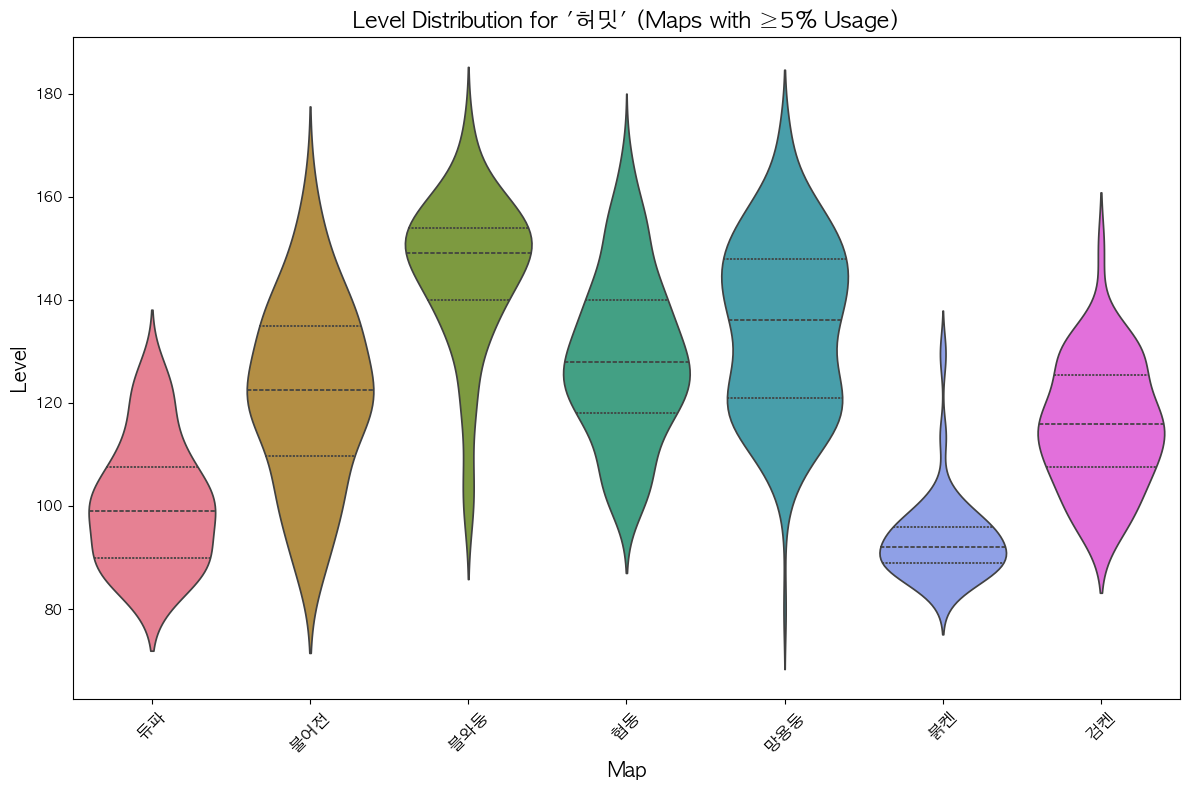

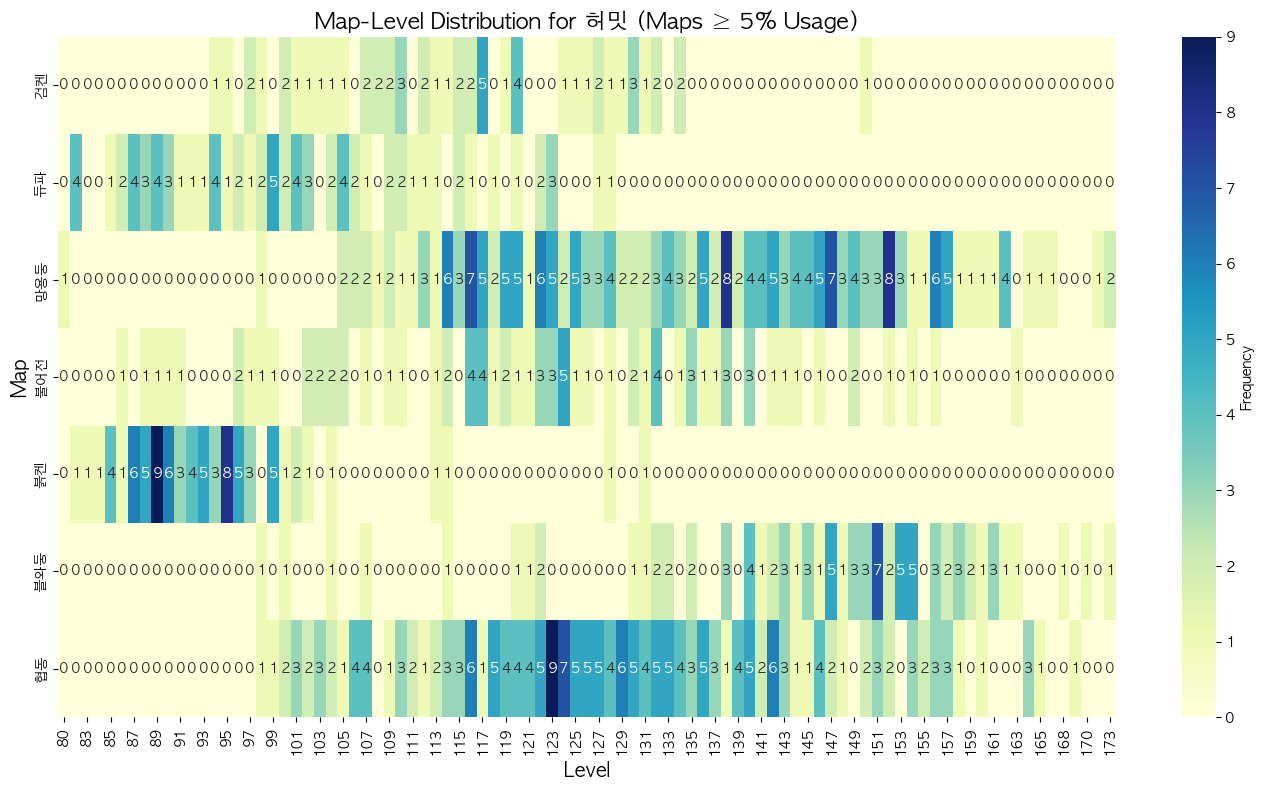

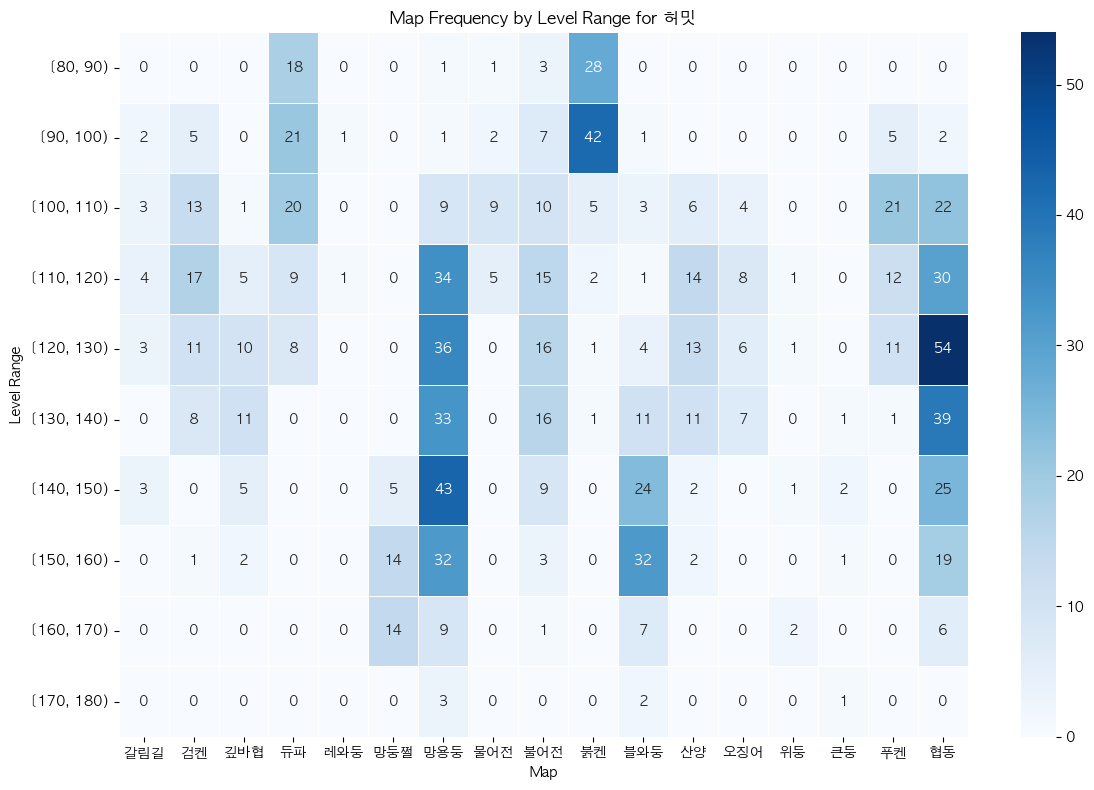

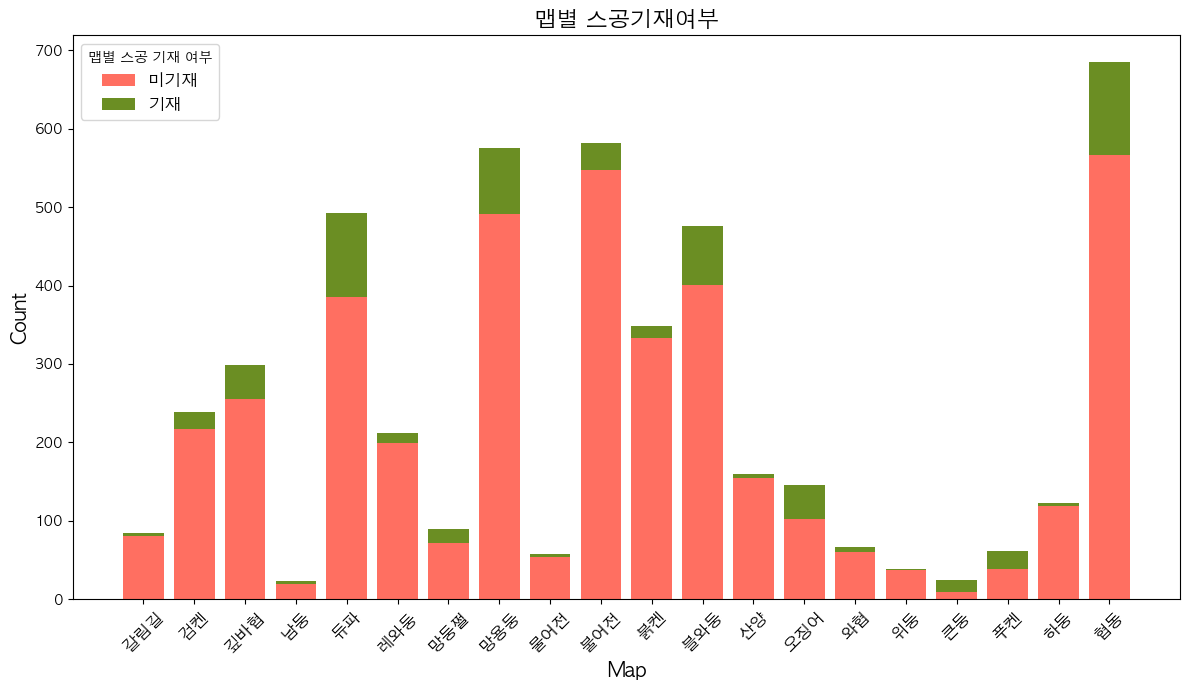

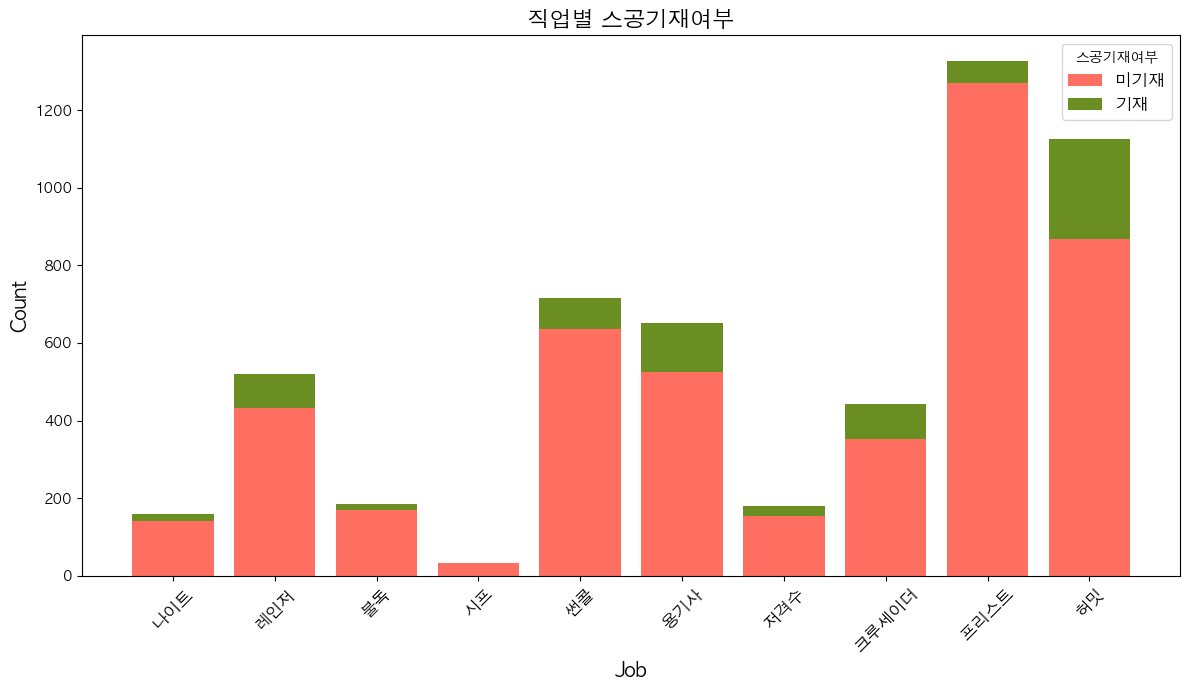

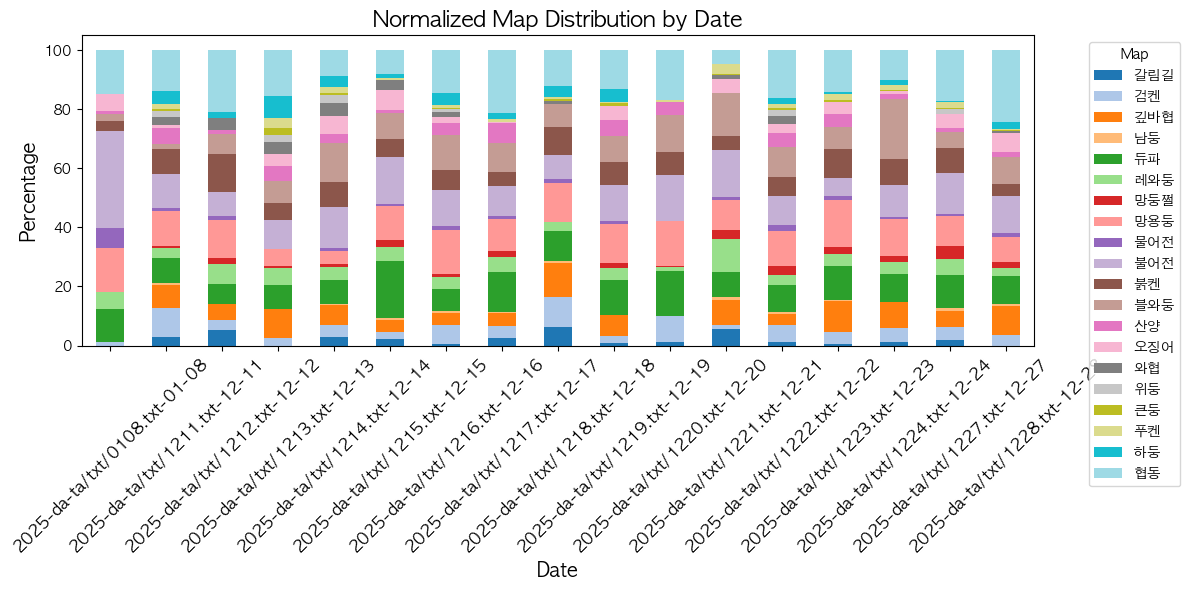

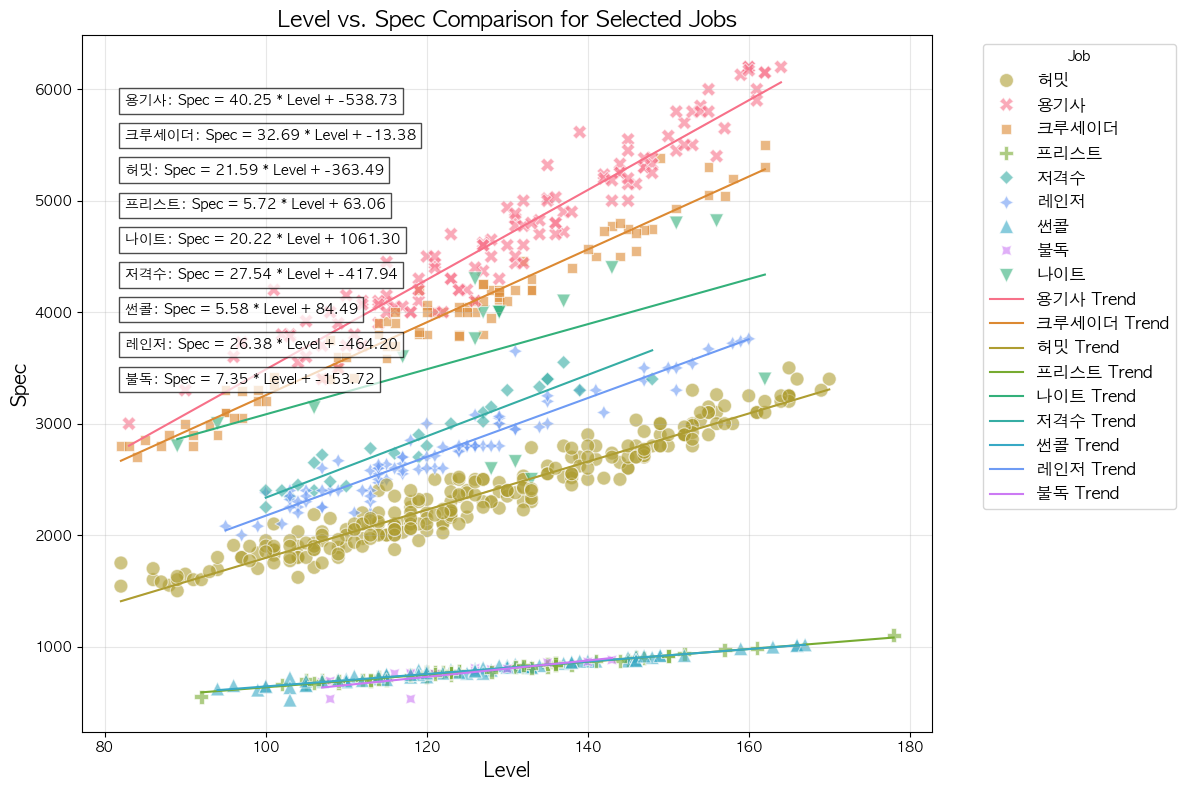

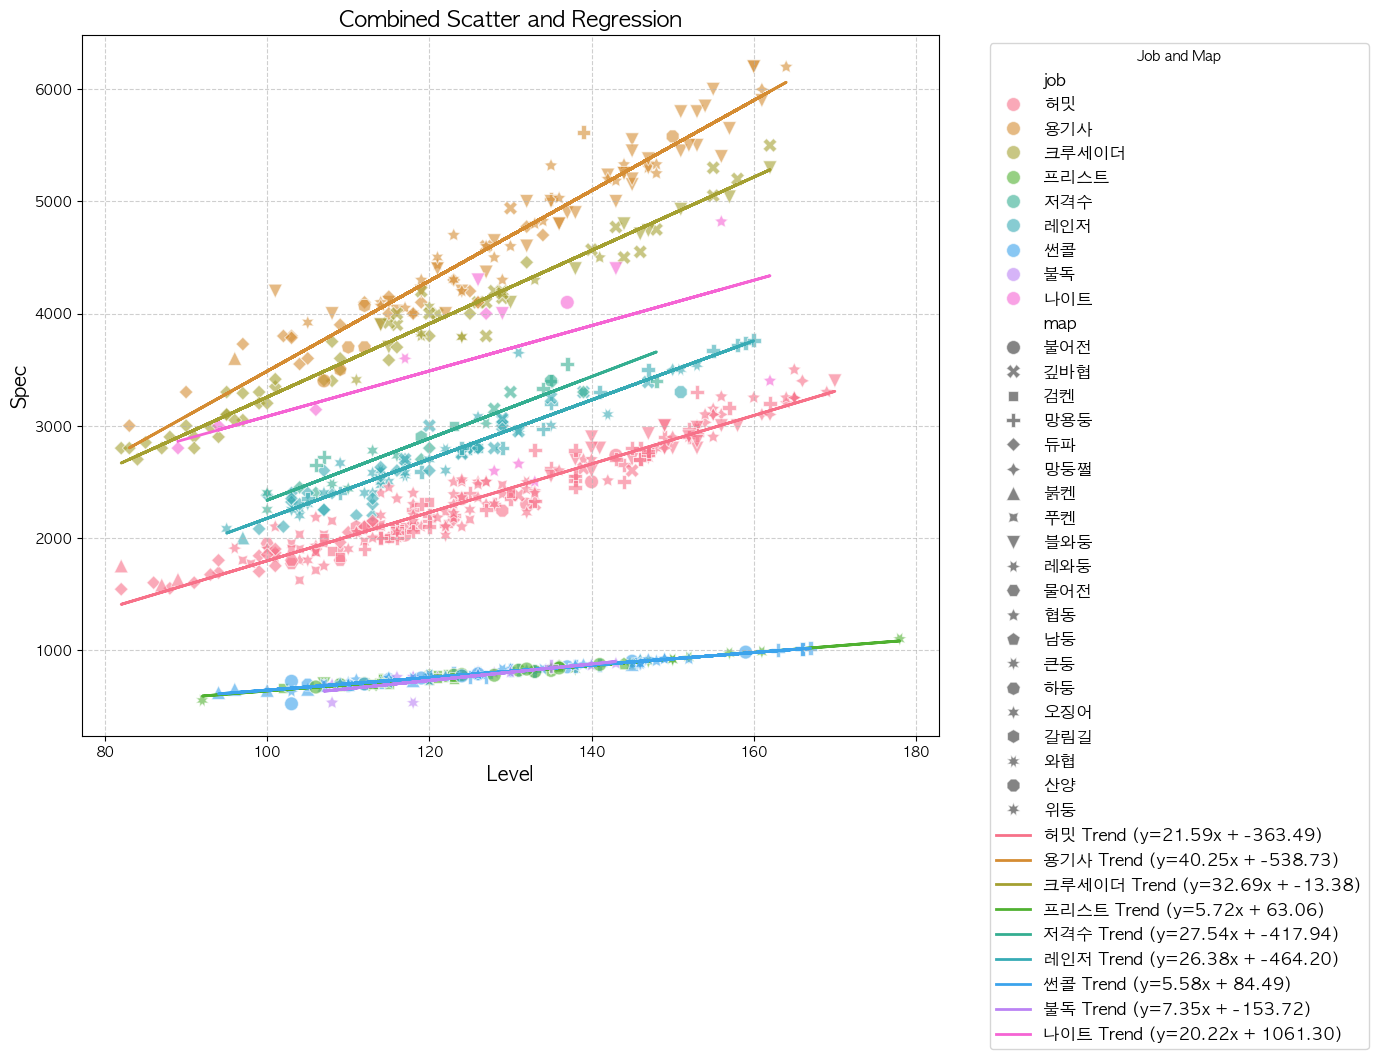

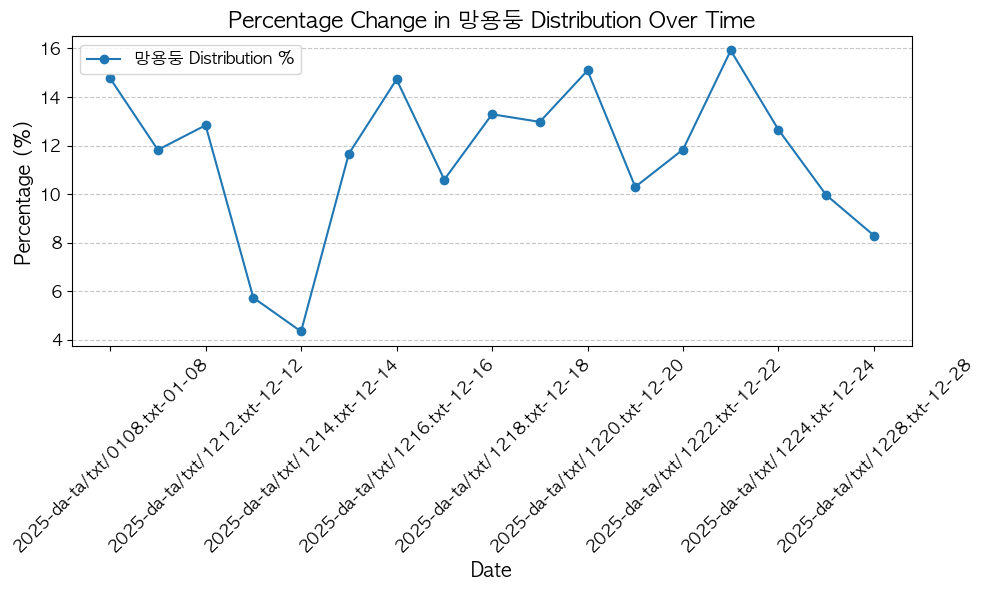

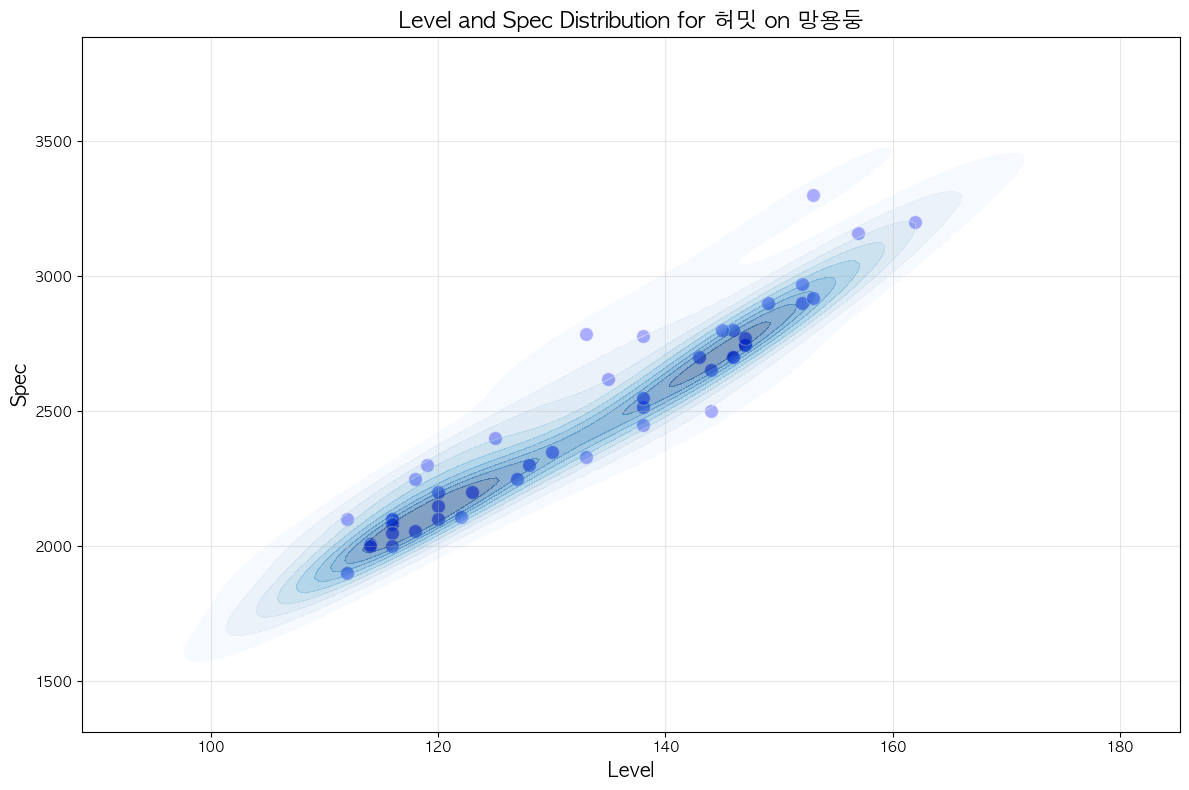

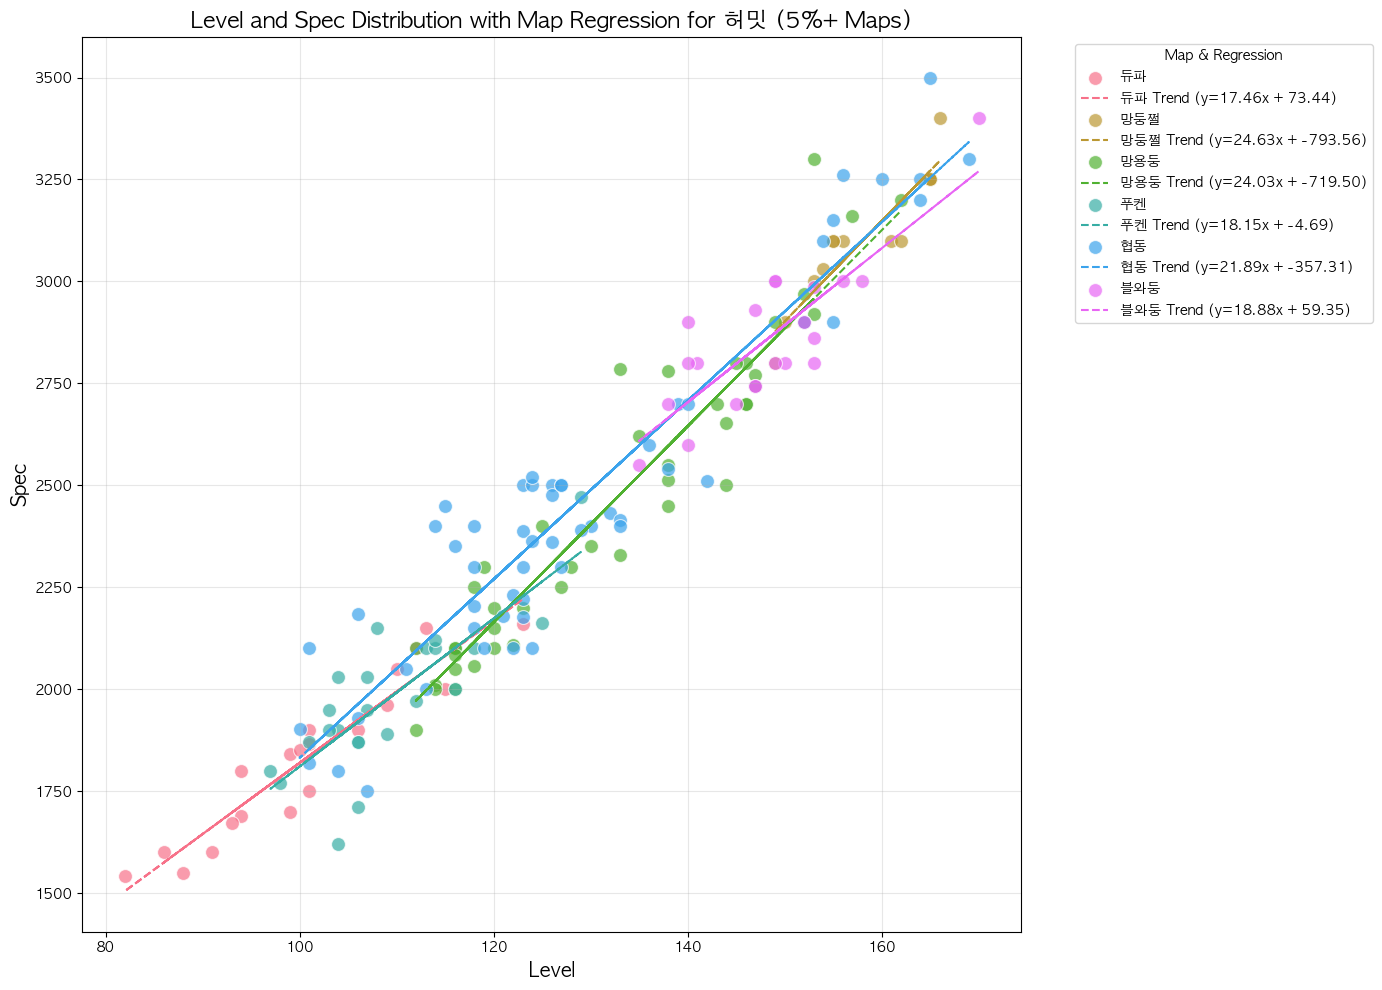

In [8]:
%run _03_data_visualization.ipynb

job="허밋"
jobs=["허밋", "썬콜", "용기사"]
input_map="망용둥"
input_maps=["망용둥", "불어전"]
start_level=120
end_level=160
input_level=131

#1 직업별 평균 스펙
average_spec_by_job(df)
#2 맵별 직업 분포
plot_job_frequency_by_map(df)
#3 특정 직업, 레벨(optional), 스펙_filled
plot_level_spec_with_regression(df, job)
plot_level_spec_with_regression(df, job, input_level=input_level, use_spec_filled=True)
#4 레벨+-5의 스펙 회귀
plot_level_spec_with_regression_by_level(df, job, input_level)
#5 특정 직업의 레벨 별 맵 분포
plot_level_by_map_by_job(df, job)
#6 특정직업의 레벨별 사냥터 분포(5%+)
plot_level_distribution_by_job_and_map(df, job)
#7 특정 직업의 레벨별 맵 히트맵
plot_map_level_heatmap_for_job(df, job)
#8 특정직업의 레벨 범위별 사냥터 히트맵 
plot_map_frequency_by_level_range(df, job)
#9 맵별 스펙 기재 여부
visualize_spec_validity_by_map(df, job='all')
#10 직업별 스펙 기재 여부, job optional
visualize_spec_validity_by_jobs(df, jobs=None)
#11 날짜별 맵 사용 비율
visualize_map_distribution_by_date(df)
#12 직업별 레벨(범위 설정 가능)당 스펙
visualize_level_spec_comparison(df, jobs=None, start_level=None, end_level=None)
#13 직업별 레벨에 따른 스공과 맵, 회귀
plot_combined_scatter_with_regression(df, start_level=None, end_level=None, maps=None)
#14 맵 사용빈도 변화 추이
visualize_map_percentage_change(df, input_map)
#15 특정 직업의 맵 레벨과 스펙에 따른 분포도
plot_level_spec_distribution_of_job_and_map(df, input_map, job, use_spec_filled=False)
#16 특정 직업의 맵별분포와 레벨, 스펙 회귀
plot_level_spec_distribution_of_job(df, job)

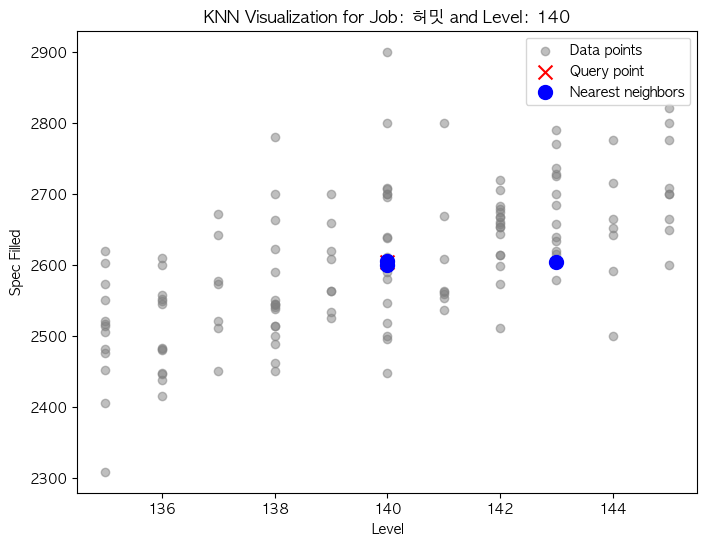

Similarity scores for recommended maps:
Map: 협동, Score: 2.3435400120852137
Map: 블와둥, Score: 3.1636638936197414
Recommended Maps and Scores: ['협동', '블와둥']


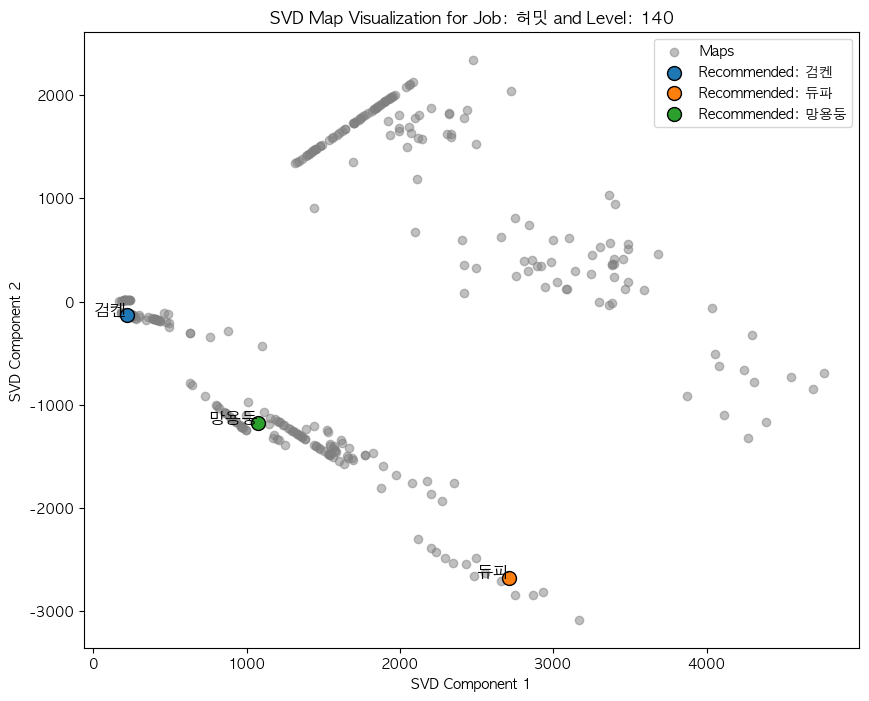

Unique maps after preprocessing:
['듀파' '불어전' '블와둥' '협동' '망용둥' '붉켄' '검켄']
Similarity scores for recommended maps:
Map: 망용둥, Score: 1.0000000000000009
Map: 듀파, Score: 1.3114509478384662e-15
Map: 검켄, Score: 4.163336342344337e-17
Recommended Maps: Index(['망용둥', '듀파', '검켄'], dtype='object', name='map')
Filtering out the top 99.9% outliers with distance greater than 2.8779377176438317


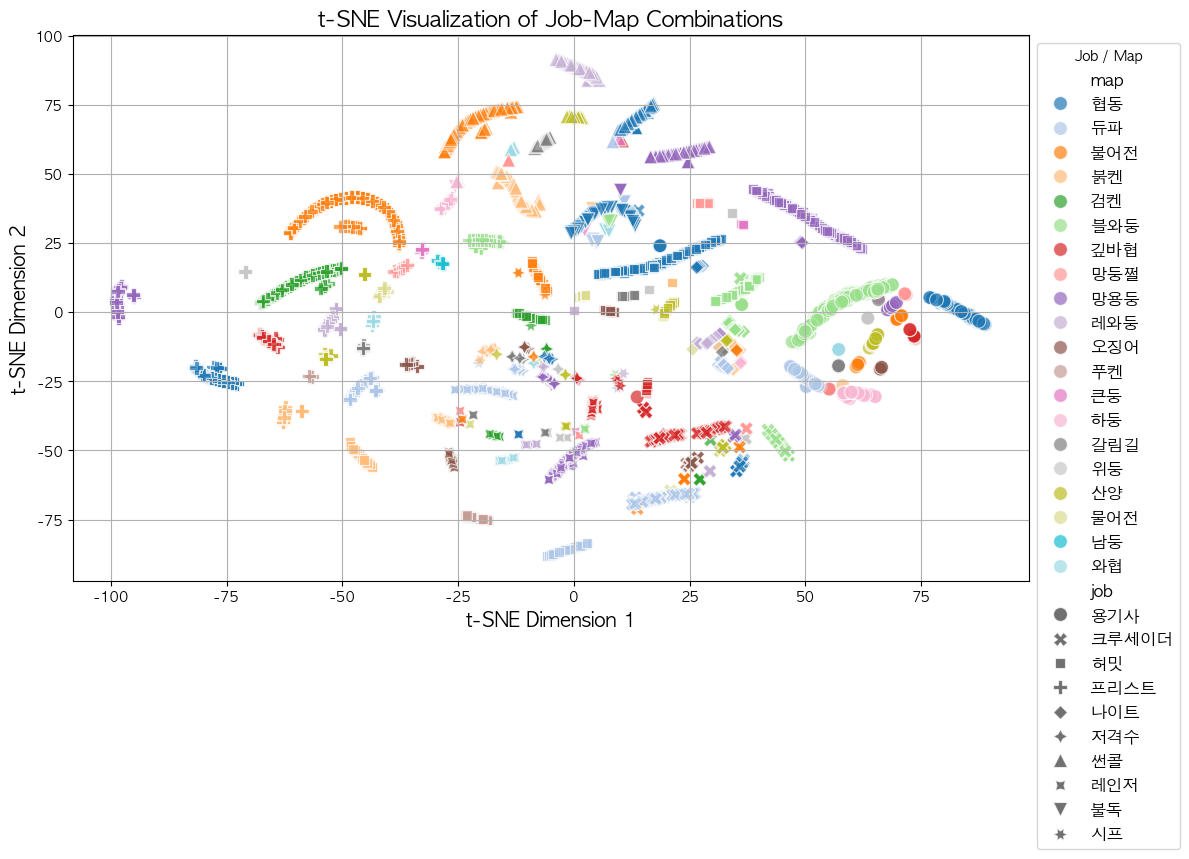

      party_id      time  level   job    spec  map  \
2822       228   오후 4:38   80.0  프리스트     NaN  망둥쩔   
3026       133   오후 1:33  156.0   나이트  4820.0   협동   
4036       182   오후 4:24  113.0    썬콜     NaN  블와둥   
4194        25  오전 12:19  115.0   용기사     NaN   검켄   
4347       171  오전 12:45  135.0   용기사     NaN  물어전   
4790       677   오전 1:39  144.0    썬콜     NaN  블와둥   

                               date  valid  valid_spec  spec_by_level  \
2822  2025-da-ta/txt/1212.txt-12-12   True       False            NaN   
3026  2025-da-ta/txt/1211.txt-12-11   True        True      30.897436   
4036  2025-da-ta/txt/1228.txt-12-28   True       False       6.258403   
4194  2025-da-ta/txt/1216.txt-12-16   True       False      35.369864   
4347  2025-da-ta/txt/1216.txt-12-16   True       False      35.369864   
4790  2025-da-ta/txt/1216.txt-12-16   True       False       6.226383   

      avg_spec_by_level  spec_filled  tsne_dim1  tsne_dim2  \
2822                NaN  2210.246683 -55.974045

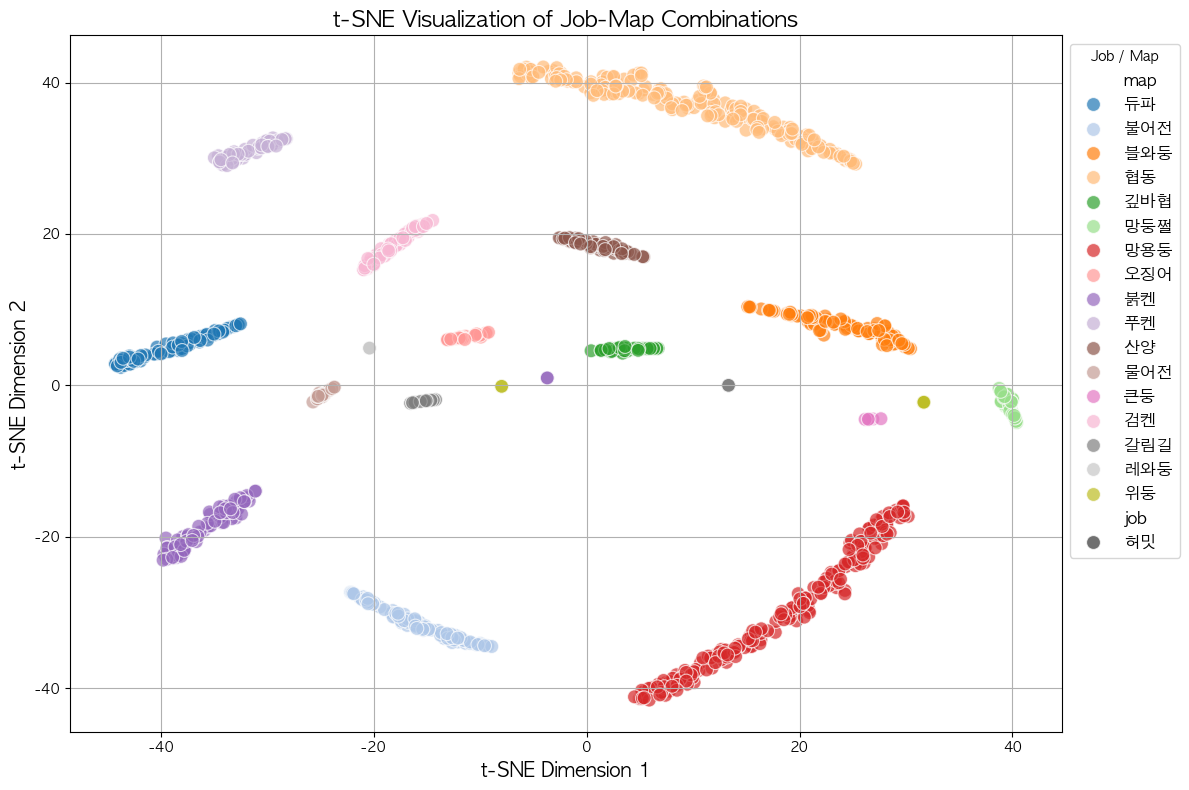

     party_id     time  level job  spec  map                           date  \
83         57  오후 8:54  125.0  허밋   NaN   협동  2025-da-ta/txt/1227.txt-12-27   
678       198  오후 9:10   80.0  허밋   NaN  망용둥  2025-da-ta/txt/1219.txt-12-19   

     valid  valid_spec  spec_by_level  avg_spec_by_level  spec_filled  \
83    True       False      19.182637          19.182637  2420.736950   
678   True       False      18.446821          18.446821  1510.024878   

     tsne_dim1  tsne_dim2  distance_to_nearest  
83    8.765888  38.792439             1.335434  
678 -11.402671 -16.978260             3.706943  


In [9]:
%run _04_modeling.ipynb
recommended_maps = recommend_map_knn(140, job, level_range=5)
recommended_maps = recommend_map_svd(140, job, level_range=5)
process_tsne(df)
process_tsne(df[df['job'] == job])

In [10]:
#by Willkie